<a id = 'header'></a>

# Problem Statement
___

`Situation`
* Cookie Cats overall popularity is growing over time with players subscribing to try out the game.

`Complication`
* Revenue from in-game purchases has been declining over time.
* Total number of active players are also declining with players uninstalling the game after playing for few days.

`Question`
* How might we increase YoY revenue from game purchases by increasing retention rate of gamers?

# 0.0 Import Libraries
___

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import statistics

from scipy.stats import shapiro , levene
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# import warnings
# warnings.filterwarnings("ignore")
# warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
plt.style.use('ggplot')
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# 0.5 General Function
___

<a id = 'content_page'><a/>
# 1.0 Exploring Datasets
___

* [1.1 Dataset Overview](#section_1.1)
* [1.2 Dataset Dictionary](#section_1.2)    
* [1.3 Exploring Null Values](#section_1.3)
* [1.4 Exploring Outliers](#section_1.4)
* [1.5 Visualing Dataset](#section_1.5)
    

<a id = 'content_page_2'><a/>
# 2.0 Basic Business Question
___

* [2.1 Overall 1-Days Retention Rate](#section_2.1)
* [2.2 Overall 7-Days Retention Rate](#section_2.2)  
* [2.3 Players who never played before](#section_2.3) 
* [2.4 Game difficulty impact on Player Count](#section_2.4)
* [2.5 Seven Days Retention Rate Cross Tab](#section_2.5)
* [2.6 Game Rounds Summary for Diff. Game Versions](#section_2.6)

<a id = 'content_page_3'><a/>
# 3.0 Two-Sample Test
___

* [3.1 Shapiro Test of Normality](#section_3.1)
* [3.2 Levene Test of Variance](#section_3.2)
* [3.3 Test of significance: Two sample test](#section_3.3)    

<a id = 'content_page_4'><a/>
# [4.0 Key Insights and Recommendations](#section_4)
___

In [3]:
# Import Dataset
df_user=pd.read_csv('datasets/Mini_project_2_Data.csv')
df_user.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
df_user.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


<a id = 'section_1.1'><a/>
### 1.1 Dataset Overview
[(Back to Top)](#content_page)
___

In [6]:
print('DF Shape shape: ' , df_user.shape)
print('DF ndim: ' , df_user.ndim)
print('DF size: ' , df_user.size)

DF Shape shape:  (90189, 5)
DF ndim:  2
DF size:  450945


<a id = 'section_1.2'><a/>
### 1.2 Data Dictionary
[(Back to Top)](#content_page)    
___

| Variables | Variables Description |
|---|---|
| userid | a unique number that identifies each player |
| version | whether the player was put in the control group A (level 30) or test group B (level 40)  |
| sum_gamerounds | the number of game rounds played by the player during 1st week of installation |
| retention_1 | did the player come back and play 1 day after installing? |
| retention_7 | did the player come back and play 7 day after installing? |

<a id = 'section_1.3'><a/>
### 1.3 Exploring Null Value
[(Back to Top)](#content_page)
___
- No Null Value observed from Dataset.

In [7]:
df_user.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

<a id = 'section_1.4'><a/>
### 1.4 Checking for Outliers
[(Back to Top)](#content_page)
___
- No Null Value observed from Dataset.

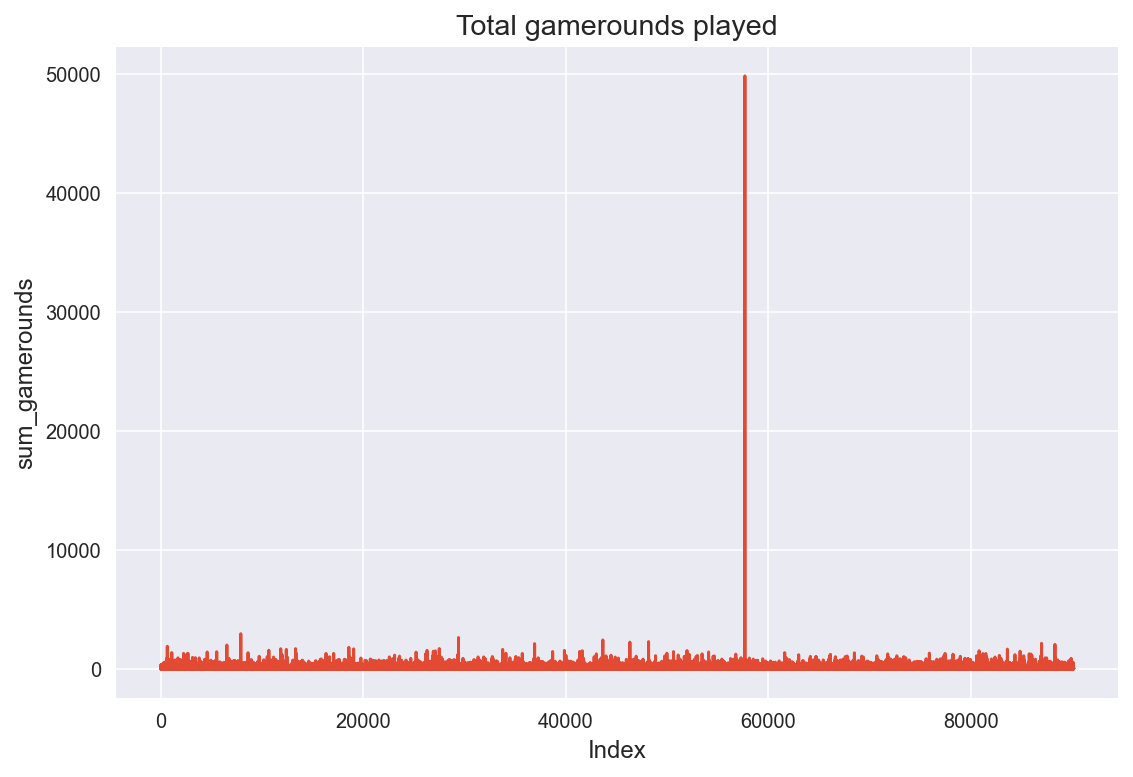

In [8]:
df_user['sum_gamerounds'].plot(figsize = (9,6))

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds");

In [9]:
# Locating Outlier for sum_gamerounds
# There is only 1 observed values more than 3000 game rounds.
df_user[['sum_gamerounds']].sort_values(by = 'sum_gamerounds' , ascending = False).head()

,sum_gamerounds
57702,49854
7912,2961
29417,2640
43671,2438
48188,2294


In [10]:
print(f'DF before remove outlier: {df_user.shape}')
print(f'DF Max value for sum_gamerounds before removal : {df_user["sum_gamerounds"].max()}')
print('---------------------------------------------')

df_user = df_user[df_user['sum_gamerounds'] < 3000]

print(f'DF after remove outlier: {df_user.shape}')
print(f'DF Max value for sum_gamerounds after removal : {df_user["sum_gamerounds"].max()}')

DF before remove outlier: (90189, 5)
DF Max value for sum_gamerounds before removal : 49854
---------------------------------------------
DF after remove outlier: (90188, 5)
DF Max value for sum_gamerounds after removal : 2961


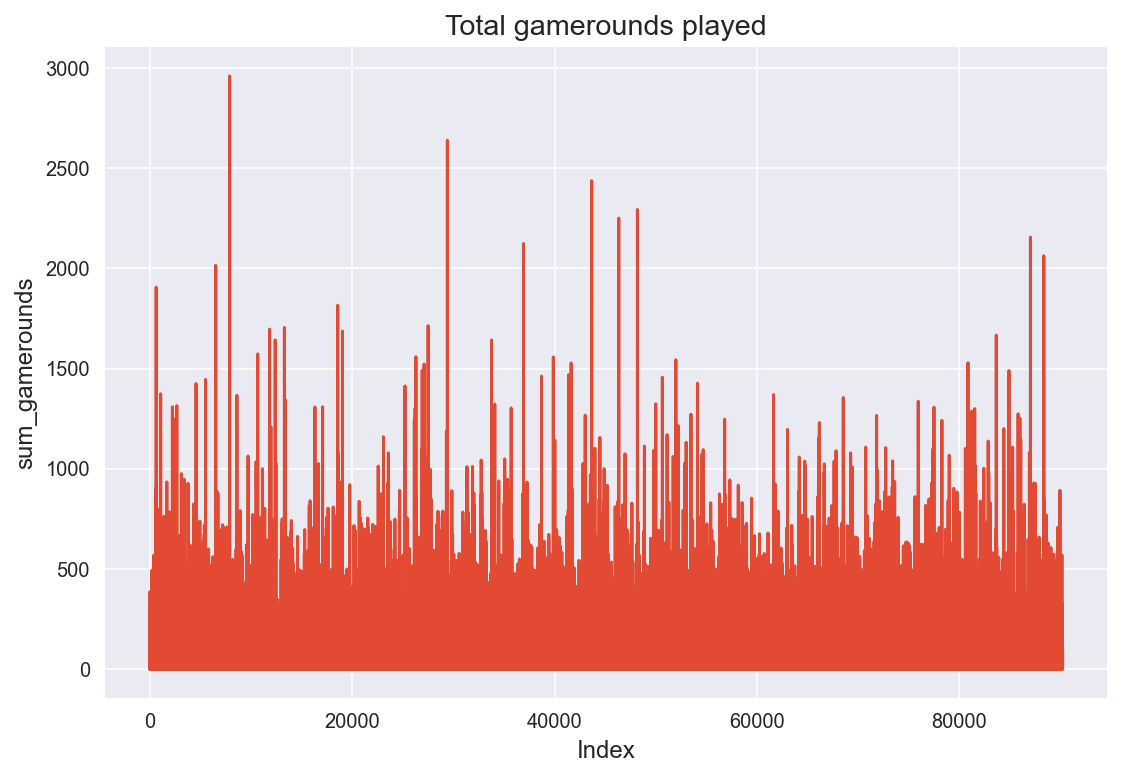

In [11]:
df_user['sum_gamerounds'].plot(figsize = (9,6))

plt.title("Total gamerounds played")
plt.xlabel("Index")
plt.ylabel("sum_gamerounds");

<a id = 'section_1.5'><a/>
### 1.5 Visualising Data
[(Back to Top)](#content_page)
___


### 1.5.1 Game Round Distribution (Sqrt Sum Game Rounds)
___

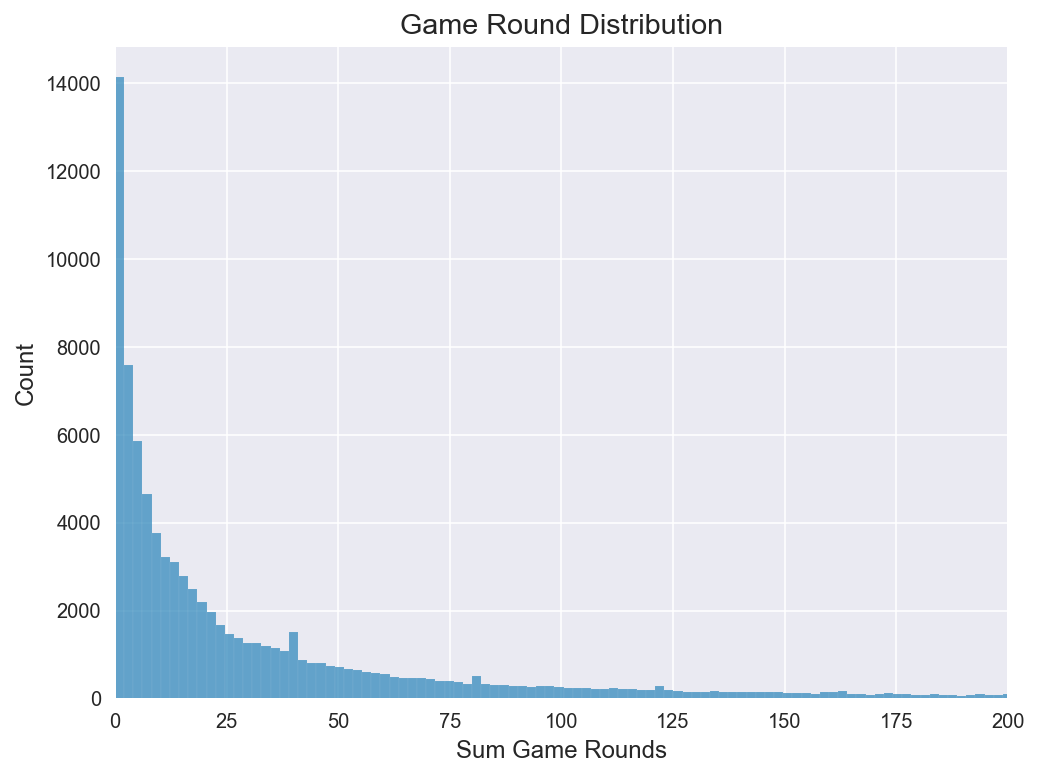

In [12]:
plt.figure(figsize = (8,6))
sns.histplot(data = df_user,
             x = df_user['sum_gamerounds'])

plt.title('Game Round Distribution')
plt.xlabel('Sum Game Rounds')
plt.xlim(0,200);

### 1.5.2 Different Gate Distribution
___

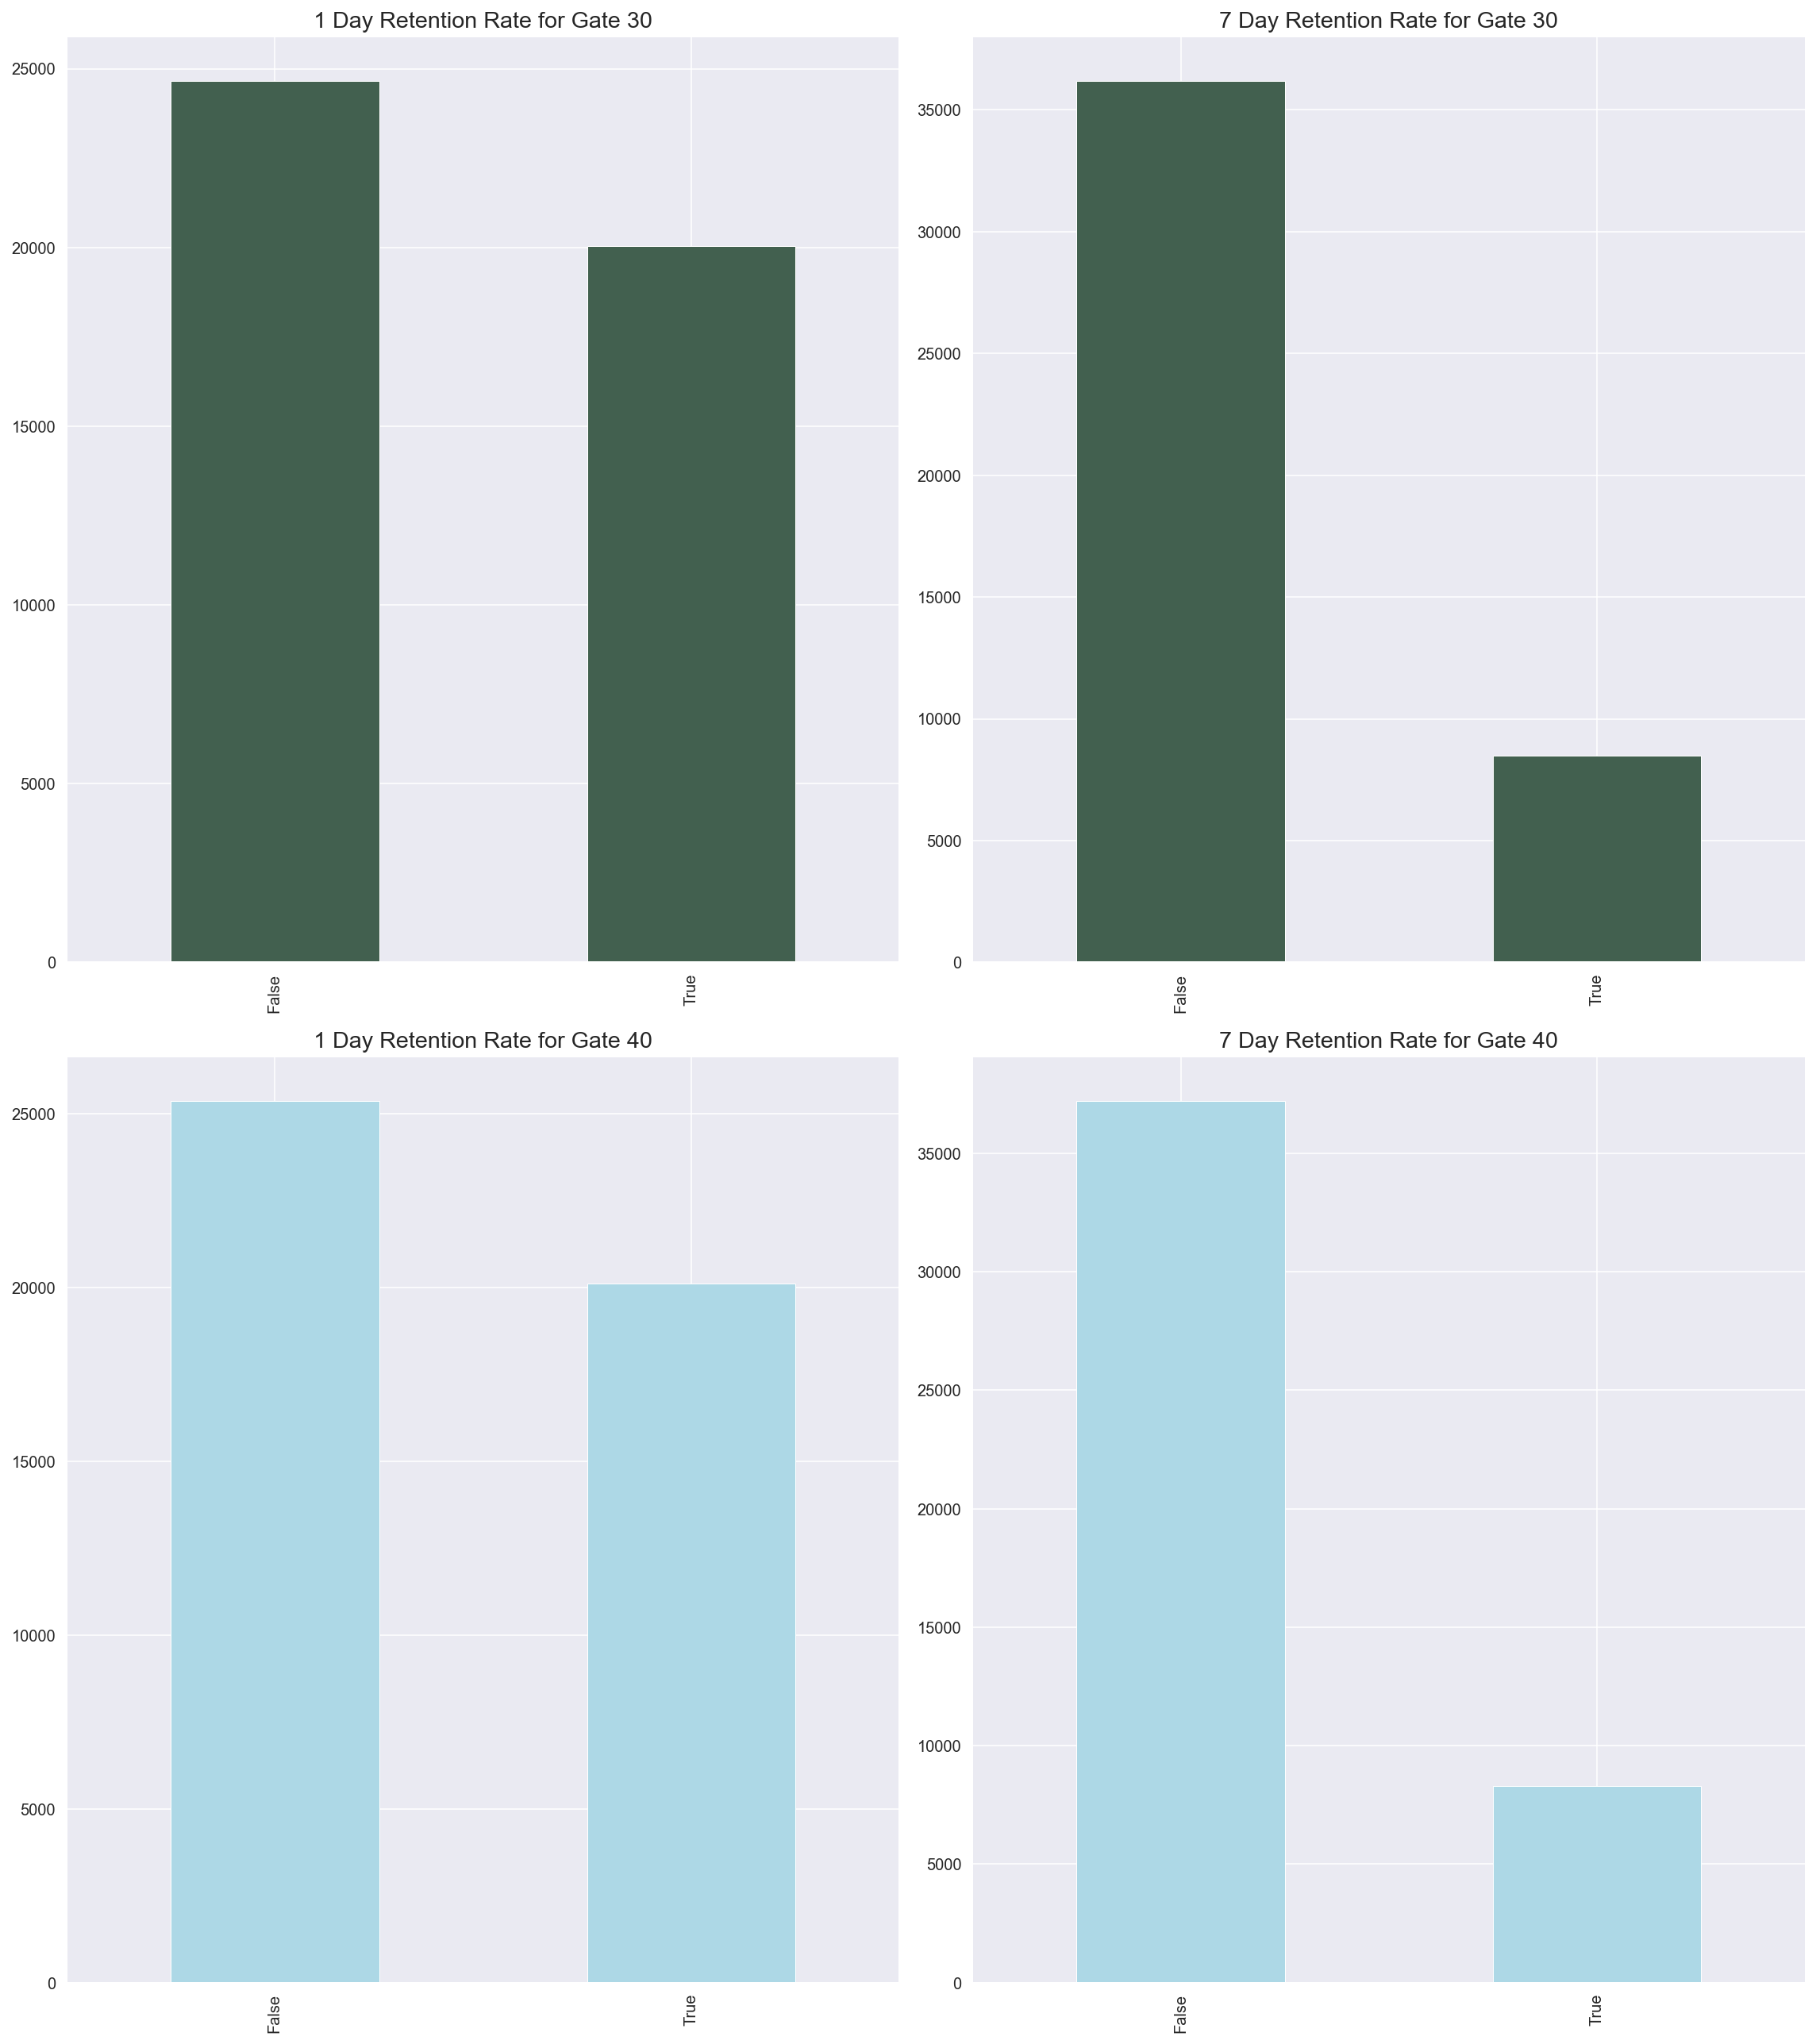

In [13]:
group_A=pd.DataFrame(df_user[df_user.version=="gate_30"])
group_B=pd.DataFrame(df_user[df_user.version=="gate_40"])

fig , axes = plt.subplots(2,2, figsize = (16,18))

# Plot For Group A
group_A['retention_1'].value_counts().plot(kind = 'bar' , color = '#42604f' ,ax = axes[0,0])
axes[0,0].set_title('1 Day Retention Rate for Gate 30')

group_A['retention_7'].value_counts().plot(kind = 'bar', color = '#42604f' , ax = axes[0,1])
axes[0,1].set_title('7 Day Retention Rate for Gate 30')

# Plot For Group B
group_B['retention_1'].value_counts().plot(kind = 'bar' , color = 'lightblue' , ax = axes[1,0])
axes[1,0].set_title('1 Day Retention Rate for Gate 40')

group_B['retention_7'].value_counts().plot(kind = 'bar' , color = 'lightblue' , ax = axes[1,1])
axes[1,1].set_title('7 Day Retention Rate for Gate 40')

plt.tight_layout();

<a id = 'section_2.1'><a/>
### 2.1 Overall 1-Days Retention Rate
[(Back to Top)](#content_page_2)
___

In [14]:
df_user['retention_1'].value_counts(normalize = True)

False    0.554786
True     0.445214
Name: retention_1, dtype: float64

In [15]:
re1_dict = df_user['retention_1'].value_counts(normalize = True).to_dict()

for key , value in re1_dict.items():
    if key == True:
        print(f'The no. of players that come back 1 days after installing and plays is {round(value *100 , 2)}%')
    else:
        print(f'The no. of players that did not come back 1 days after installing and plays is {round(value *100 , 2)}%')

The no. of players that did not come back 1 days after installing and plays is 55.48%
The no. of players that come back 1 days after installing and plays is 44.52%


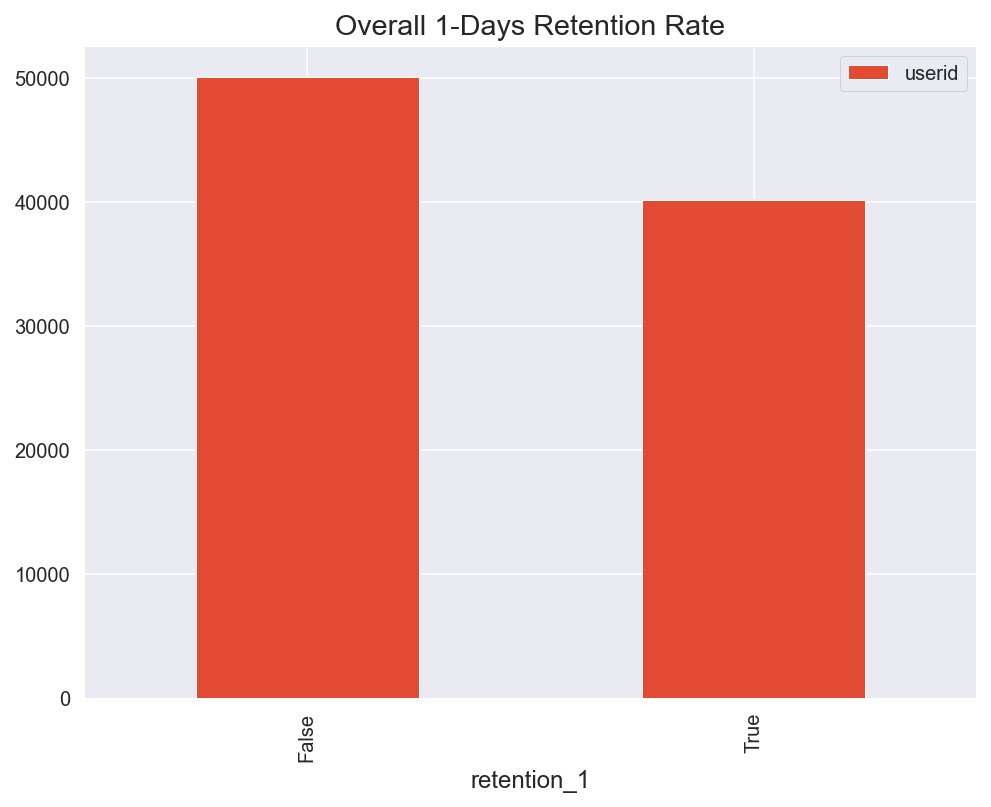

In [16]:
df_user.groupby('retention_1').count()[['userid']].plot(kind = 'bar',
                                                        figsize = (8,6))
plt.title('Overall 1-Days Retention Rate');

<a id = 'section_2.2'><a/>
### 2.2 Overall 7-Days Retention Rate
[(Back to Top)](#content_page_2)
___

In [17]:
df_user['retention_7'].value_counts(normalize = True)

False    0.813944
True     0.186056
Name: retention_7, dtype: float64

In [72]:
re7_dict = df_user['retention_7'].value_counts(normalize = True).to_dict()

for key , value in re7_dict.items():
    if key == True:
        print(f'The no. of players that come back 7 days after installing and plays is {round(value *100 , 2)}%')
    else:
        print(f'The no. of players that did not come back 7 days after installing and plays is {round(value *100 , 2)}%')

The no. of players that did not come back 7 days after installing and plays is 81.39%
The no. of players that come back 7 days after installing and plays is 18.61%


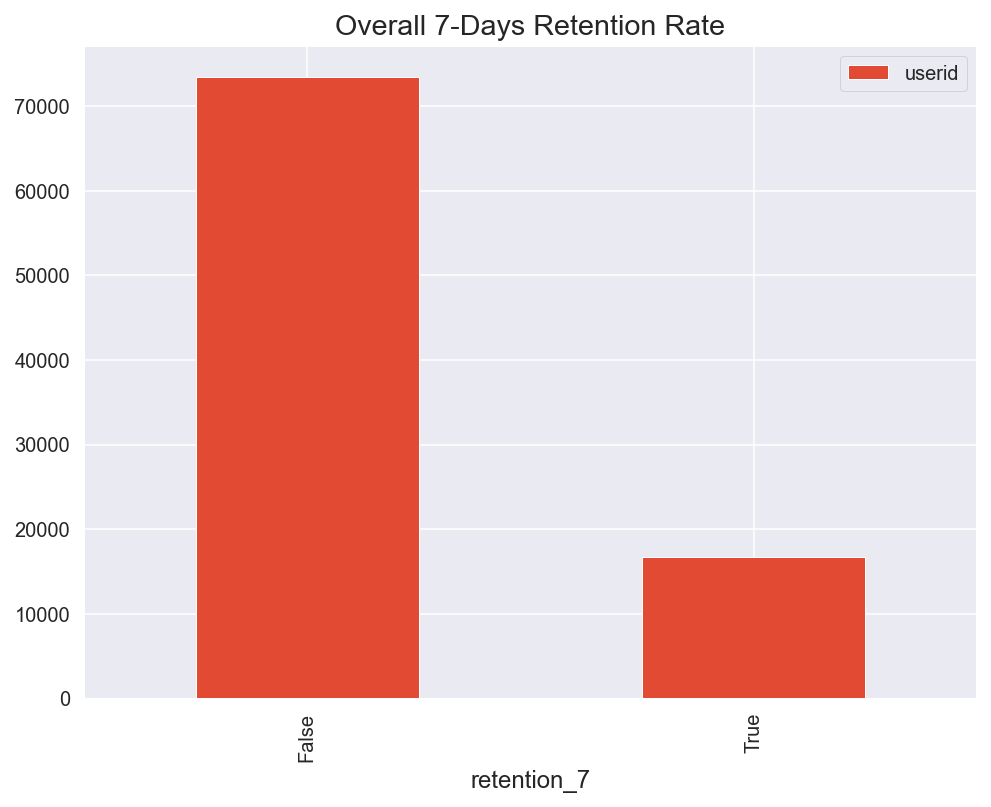

In [19]:
df_user.groupby('retention_7').count()[['userid']].plot(kind = 'bar',
                                                        figsize = (8,6))
plt.title('Overall 7-Days Retention Rate');

<a id = 'section_2.3'><a/>
### 2.3 Players who never played before
[(Back to Top)](#content_page_2)
___

In [20]:
df_user[df_user['sum_gamerounds']==0].head()

,userid,version,sum_gamerounds,retention_1,retention_7
6,1066,gate_30,0,False,False
11,2101,gate_30,0,False,False
26,3095,gate_30,0,False,False
35,4076,gate_40,0,False,False
37,4176,gate_30,0,False,False


In [21]:
no_play = len(df_user[df_user['sum_gamerounds']==0])
no_play_percent = round(no_play / len(df_user)*100 , 2)

print(f'No. of Players who downloaded but never played before is {no_play}. This is around {no_play_percent}% of the total users.')

No. of Players who downloaded but never played before is 3994. This is around 4.43% of the total users.


<a id = 'section_2.4'><a/>
### 2.4 Game difficulty impact on Player Count
[(Back to Top)](#content_page_2)
___

* Between 30 - 50 Game Rounds , there is a slight higher no. of players for Gate30.
* Overall , It is observed that the amount of players between Gate30 and Gate40 are fairly consistent despite the difficulty difference.

In [22]:
df_user.groupby(['sum_gamerounds' , 'version']).count()[['userid']][70:80]

userid
sum_gamerounds version        
35             gate_30     327
               gate_40     259
36             gate_30     301
               gate_40     254
37             gate_30     291
               gate_40     268
38             gate_30     301
               gate_40     225
39             gate_30     300
               gate_40     242

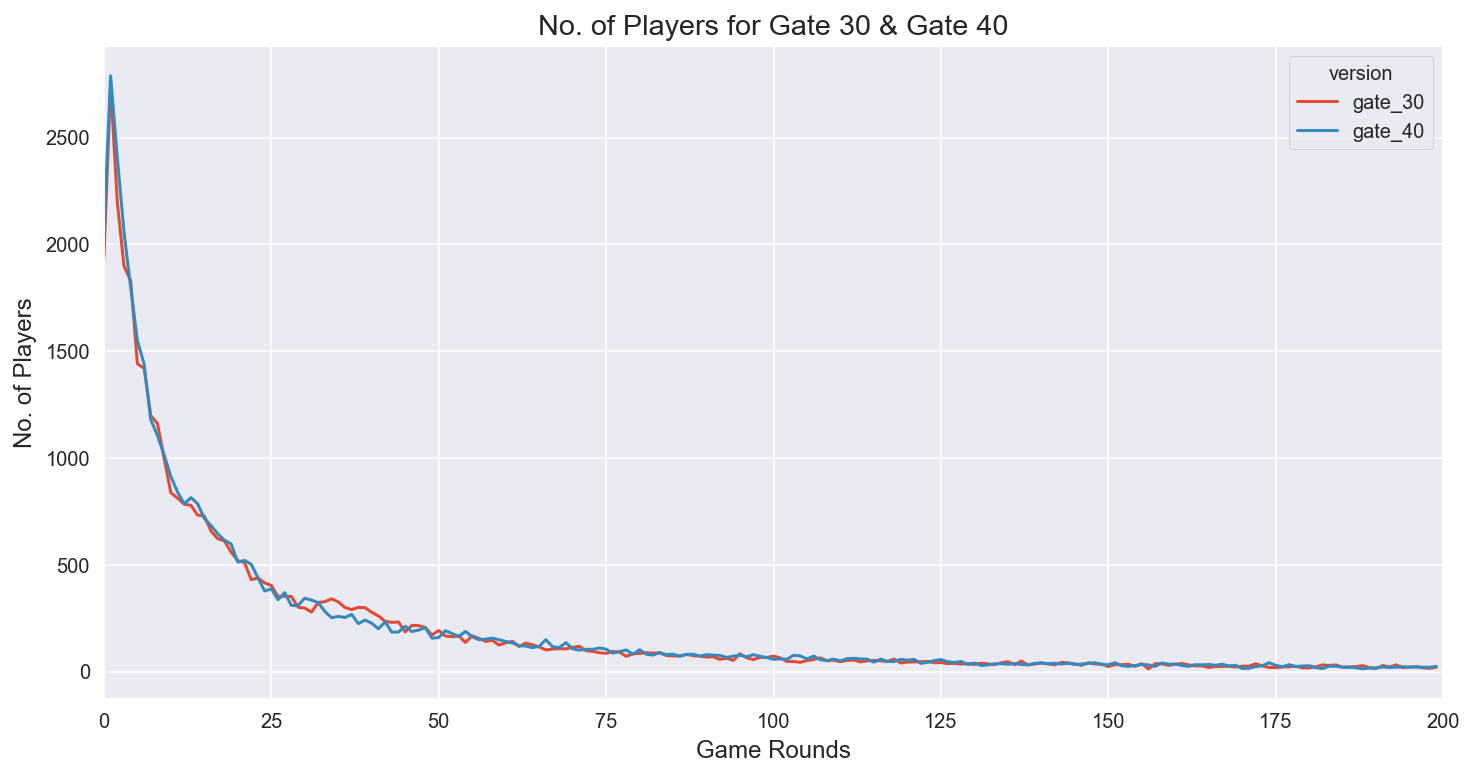

In [73]:
df_sum_gamerounds = df_user.groupby(['sum_gamerounds' , 'version']).count()[:400]

plt.figure(figsize = (12,6))
sns.lineplot(data = df_sum_gamerounds,
             x = 'sum_gamerounds',
             y = 'userid',
             hue = 'version',
             color = 'lightblue')

plt.title('No. of Players for Gate 30 & Gate 40')
plt.xlabel('Game Rounds')
plt.ylabel('No. of Players')
plt.xlim(0,200 , 10);

<a id = 'section_2.5'><a/>
### 2.5 Seven Days Retention Rate Cross Tab
[(Back to Top)](#content_page_2)
___

In [74]:
pd.crosstab(df_user.version, df_user.retention_7).apply(lambda r: r/r.sum(), axis=1)

retention_7,False,True
version,,
gate_30,0.809817,0.190183
gate_40,0.818000,0.182000


<mark>__Analsysis Results:__

* The distribution between the 2 groups are observed to be fairly consistent. Only 20% of the players come back to plays for 7 days after installation for both of the group.
* It was also interestingly observed that having Group B , having a higher level cap before reaching the gate had a slightly lower 7 days retention rate.

<a id = 'section_2.6'><a/>
### 2.6 Game Rounds Summary for Diff. Game Versions
[(Back to Top)](#content_page_2)
___

In [75]:
df_user.groupby('version').aggregate(['sum' , 'mean'])['retention_7']

,sum,mean
version,,
gate_30,8501,0.190183
gate_40,8279,0.182000


<mark>__Analsysis Results:__

Though Group B (Gate 40) has a lower total hours played (~3% lesser compared to Group A) , it is observed that the total number of hours played and the average hours played are fairly consistent across the 2 greops

<a id = 'section_3.1'><a/>
### 3.1 Shapiro Test on Normality
[(Back to Top)](#content_page_3)
___

* Distribution from histogram visualisation supports our test results.
* Distribution is heavily left skewed.

In [25]:
#Define A/B groups for hypothesis testing
#user_df["version"] = np.where(user_df.version == "gate_30", "A", "B")

group_A=pd.DataFrame(df_user[df_user.version== 'gate_30']['sum_gamerounds'])
group_B=pd.DataFrame(df_user[df_user.version== 'gate_40']['sum_gamerounds'])

In [26]:
# NULL Hypothesis H0: Distribution is normal
# ALTERNATE Hypothesis H1: Distribution is not normal    

#test for group_A
shapiro_test = stats.shapiro(group_A)
test_statistic , p_value = shapiro_test
print(f'Group A has a P-value of {p_value} , test statistics of {test_statistic}')
print('Since the p-value is less than .05, we reject the null hypothesis. the sample data does not come from a normal distribution.\n')

#test for group_B
shapiro_test = stats.shapiro(group_B)
test_statistic , p_value = shapiro_test
print(f'Group B has a P-value of {p_value} , test statistics of {test_statistic}')
print('Since the p-value is less than .05, we reject the null hypothesis. the sample data does not come from a normal distribution.\n')

Group A has a P-value of 0.0 , test statistics of 0.48864424228668213
Since the p-value is less than .05, we reject the null hypothesis. the sample data does not come from a normal distribution.

Group B has a P-value of 0.0 , test statistics of 0.4825654625892639
Since the p-value is less than .05, we reject the null hypothesis. the sample data does not come from a normal distribution.



C:\Users\Administrator\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


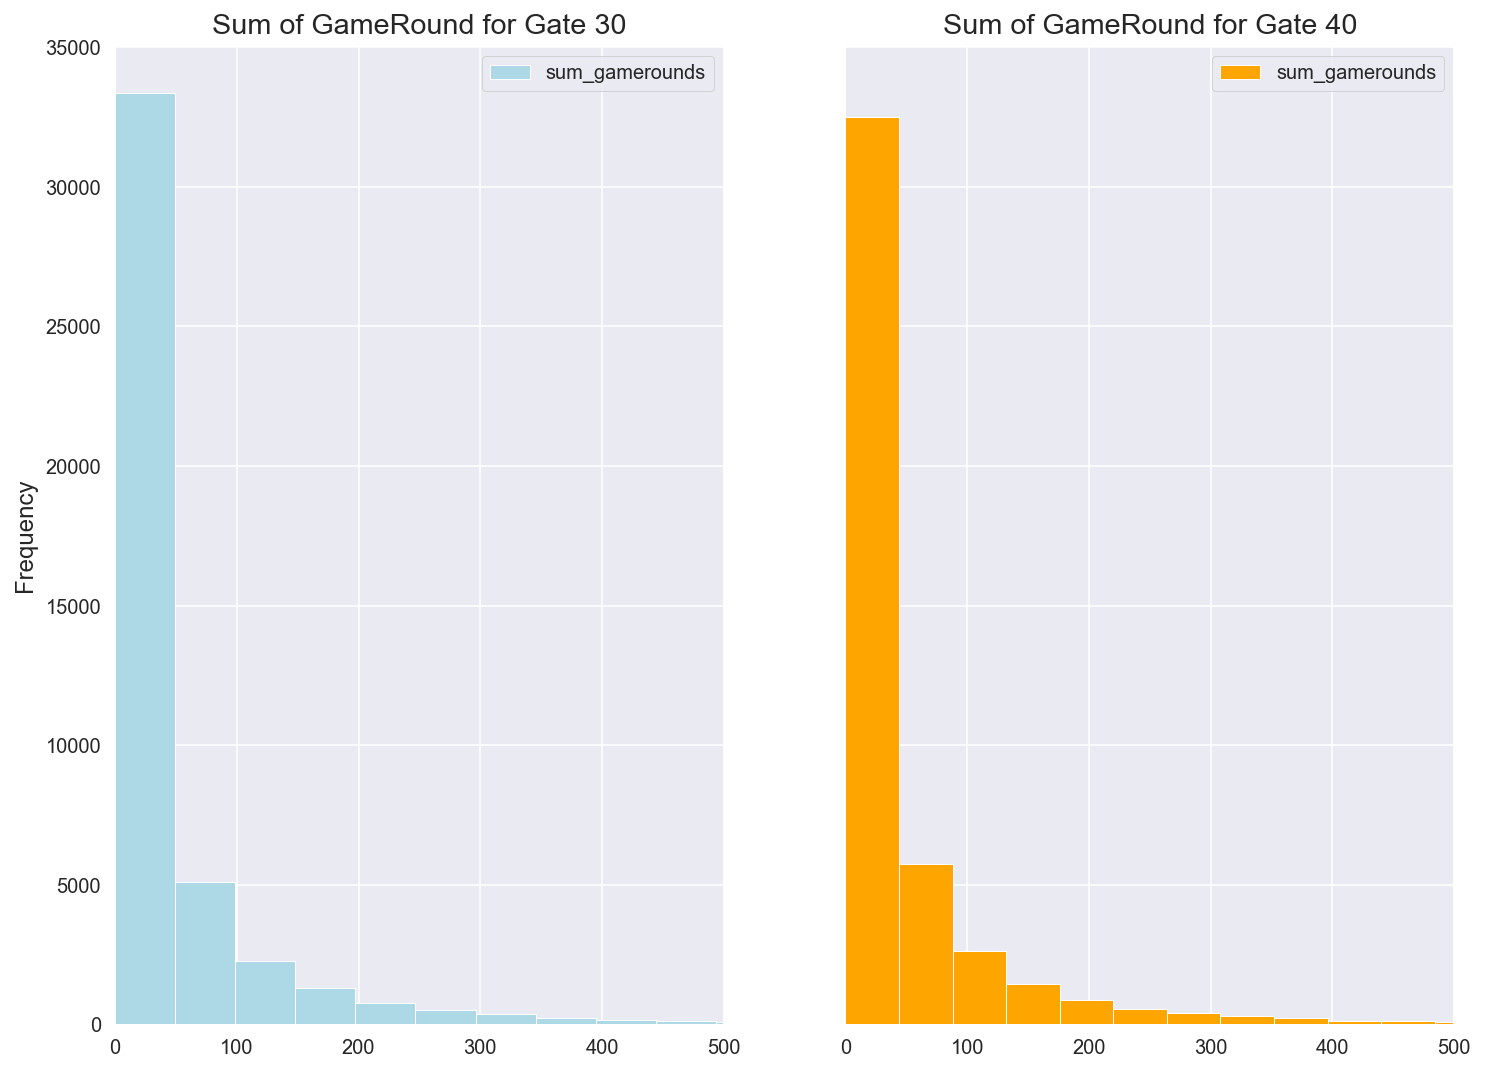

In [62]:
# Visulisation of Distribution
fig , axes = plt.subplots(1,2, figsize = (12,9) , sharey = True , sharex = True)

group_A.plot(kind = 'hist',
             bins = 60, 
             color = 'lightblue',
             ax = axes[0])
axes[0].set_title('Sum of GameRound for Gate 30')
axes[0].set_xlim(0,500)

group_B.plot(kind = 'hist',
             bins = 60, 
             color = 'orange',
             ax = axes[1])
axes[1].set_title('Sum of GameRound for Gate 40');

<a id = 'section_4.2'><a/>
### 3.2 Levene Test of homegienity of variance
[(Back to Top)](#content_page_3)
___

* From our plots , we can observed that the 25th , 50th , 75th percentile for both groups are very close to each other.

In [28]:
# NULL Hypothesis H0: Two groups have equal variances
# ALTERNATE Hypothesis H1: Two groups do not have equal variances

# If p value < 0.05, then variances are significantly different.
# If p value > 0.05 , Null Hypothesis stand and 2 groups have equal variances

#perform levene's test and accept or reject the null hypothesis based on the results
A = group_A['sum_gamerounds'].to_list()
B = group_B['sum_gamerounds'].to_list()

stat , p_value = levene(A , B)
print('Levene Test Summary')
print('-------------')
print(f'P value : {p_value}')
print(f'Test Statistic : {stat}')
print('Since P_value is more than .05, Null hypothesis stands and the 2 groups have equal variances.')

Levene Test Summary
-------------
P value : 0.7840494387892463
Test Statistic : 0.07510153837481241
Since P_value is more than .05, Null hypothesis stands and the 2 groups have equal variances.


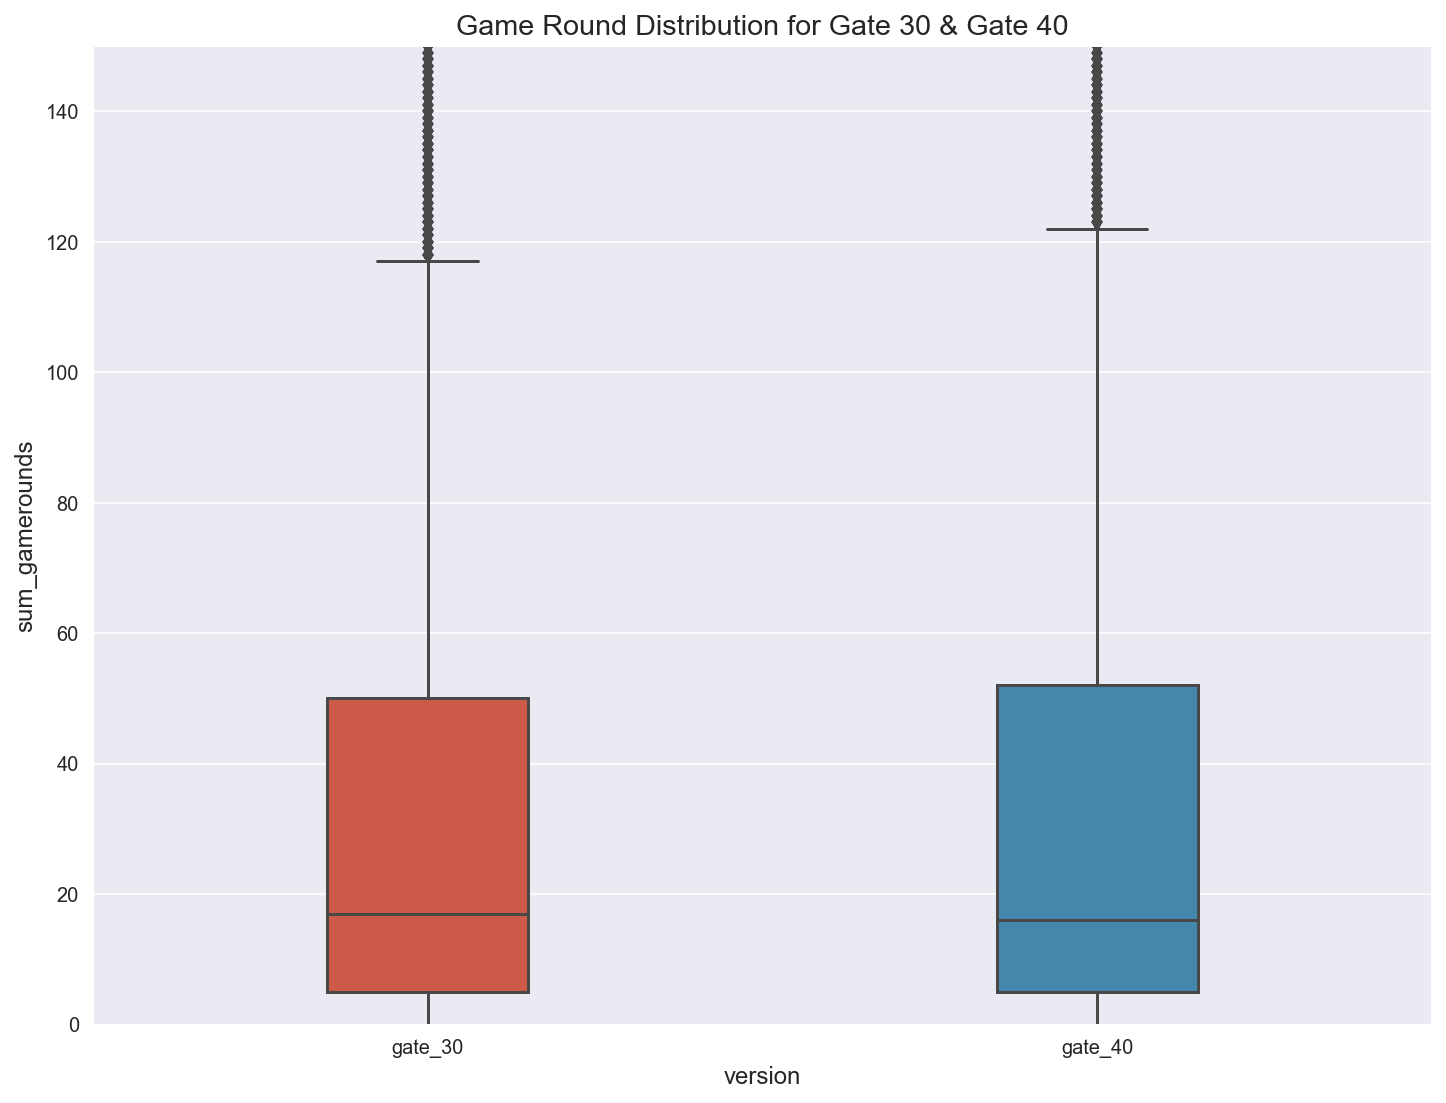

In [61]:
plt.figure(figsize = (12,9))

x = df_user[['version' , 'sum_gamerounds']]['version']
y = df_user[['version' , 'sum_gamerounds']]['sum_gamerounds']

sns.boxplot(x = x,
            y = y,
            width = 0.3)

plt.ylim(0,150)
plt.title('Game Round Distribution for Gate 30 & Gate 40');

<a id = 'section_3.3'><a/>
### 3.3 Test of significance: Two sample test
[(Back to Top)](#content_page_3)
___

In [30]:
#---------------------- Two samples test ----------------------
# NULL Hypothesis H0: Two samples are equal
# ALTERNATE Hypothesis H1: Two samples are different

# If p value < 0.05, then we reject the Null Hypothesis and the 2 samples are different.
# If p value > 0.05 , then we fail to reject the Null hypothesis and the 2 samples are equal.

#Apply relevant two sample test to accept or reject the NULL hypothesis

stat , p_value = stats.ttest_ind(group_A , group_B , equal_var =True)
print('T-test independance Summary')
print('-------------')
print(f'P value : {p_value}')
print(f'Test Statistic : {stat}')
print('Since P_value is more than .05, we fail to reject Null Hypothesis and the 2 groups are equal.')

T-test independance Summary
-------------
P value : [0.94947395]
Test Statistic : [0.06336758]
Since P_value is more than .05, we fail to reject Null Hypothesis and the 2 groups are equal.


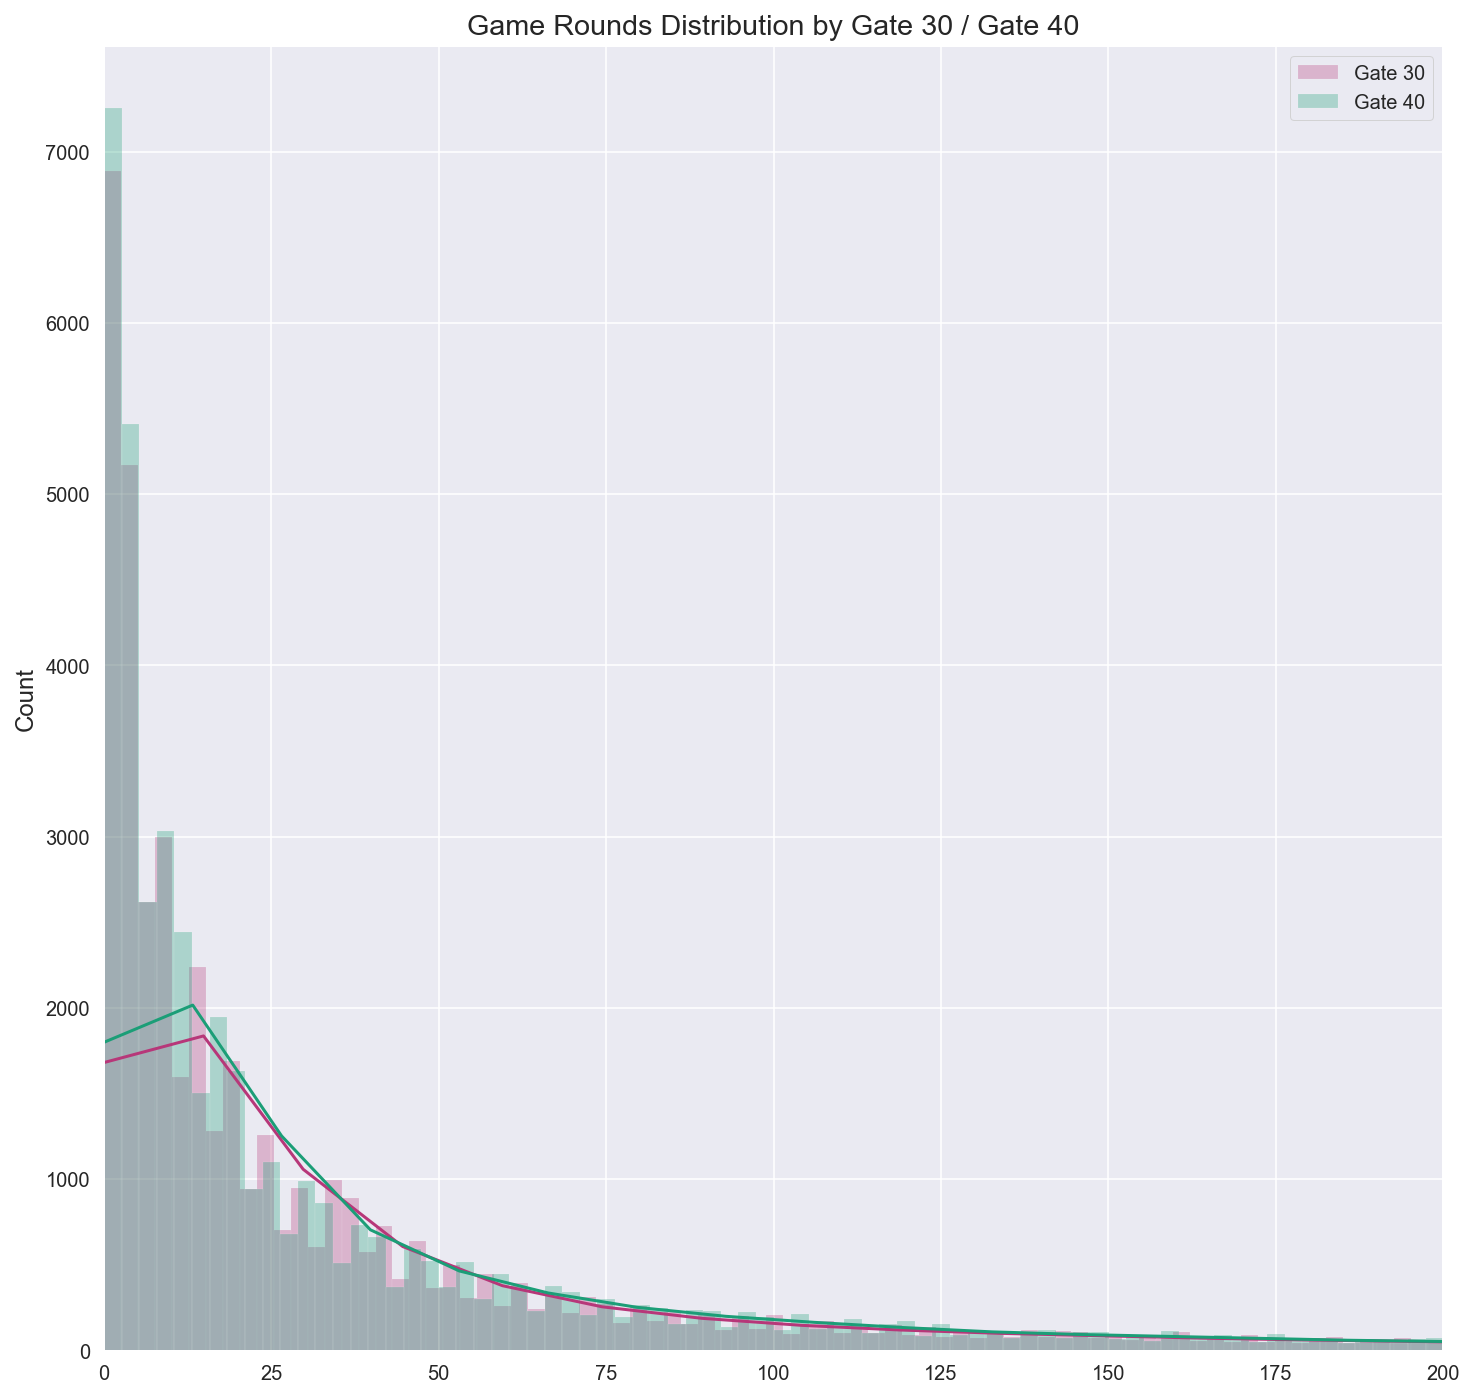

In [59]:
plt.figure(figsize = (12,12))

sns.histplot(group_A , palette = 'magma' , kde = True , alpha = 0.3 , label = 'Gate 30')
sns.histplot(group_B , palette = 'Dark2' , kde = True , alpha = 0.3 , label = 'Gate 40')

plt.legend()
plt.xlim(0,200)
plt.title('Game Rounds Distribution by Gate 30 / Gate 40')
plt.show();

<a id = 'section_4'><a/>
### 4.0 Key Insight and Business Proposal
[(Back to Top)](#content_page_4)
___
    
Based on significance testing results, if groups A and B are statistically different, which level has more advantage in terms of player retention and number of game rounds played

<a id = 'section_bonus'><a/>
### 5.0 Bonus Questions
[(Back to Top)](#content_page_bonus)
___
Using bootstrap resampling, plot the retention rate distribution for both the groups in order to visualize effect of different version of the game on retention.

In [32]:
np.random.seed(42)

def resample(group):
    resample = random.choices(group , k = len(group))
    m = statistics.mean(resample)
    return m

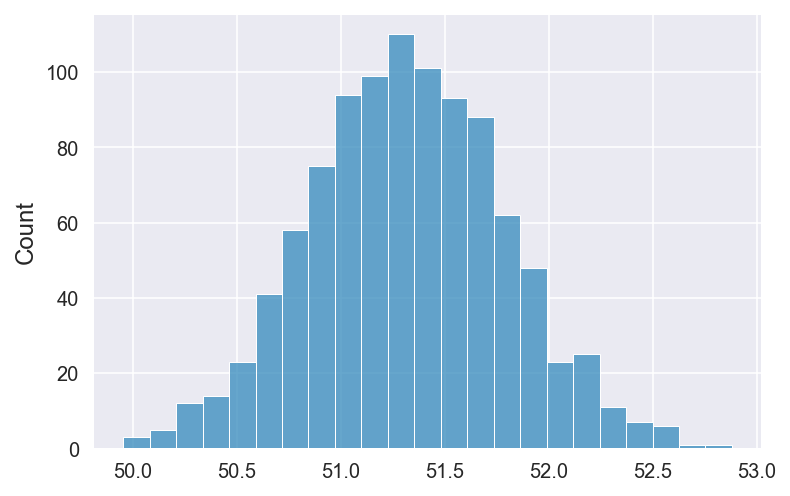

In [107]:
# A single Sample Plot for 1000 resample for Group A

mean_list_A = []

for i in range(1000):
    mean_list_A.append(resample(A))
    
sns.histplot(mean_list_A);

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, 'Plot for 500 resample')

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, 'Plot for 1000 resample')

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, 'Plot for 1500 resample')

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, 'Plot for 2000 resample')

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, 'Plot for 2500 resample')

<AxesSubplot:ylabel='Count'>

Text(0.5, 1.0, 'Plot for 3000 resample')

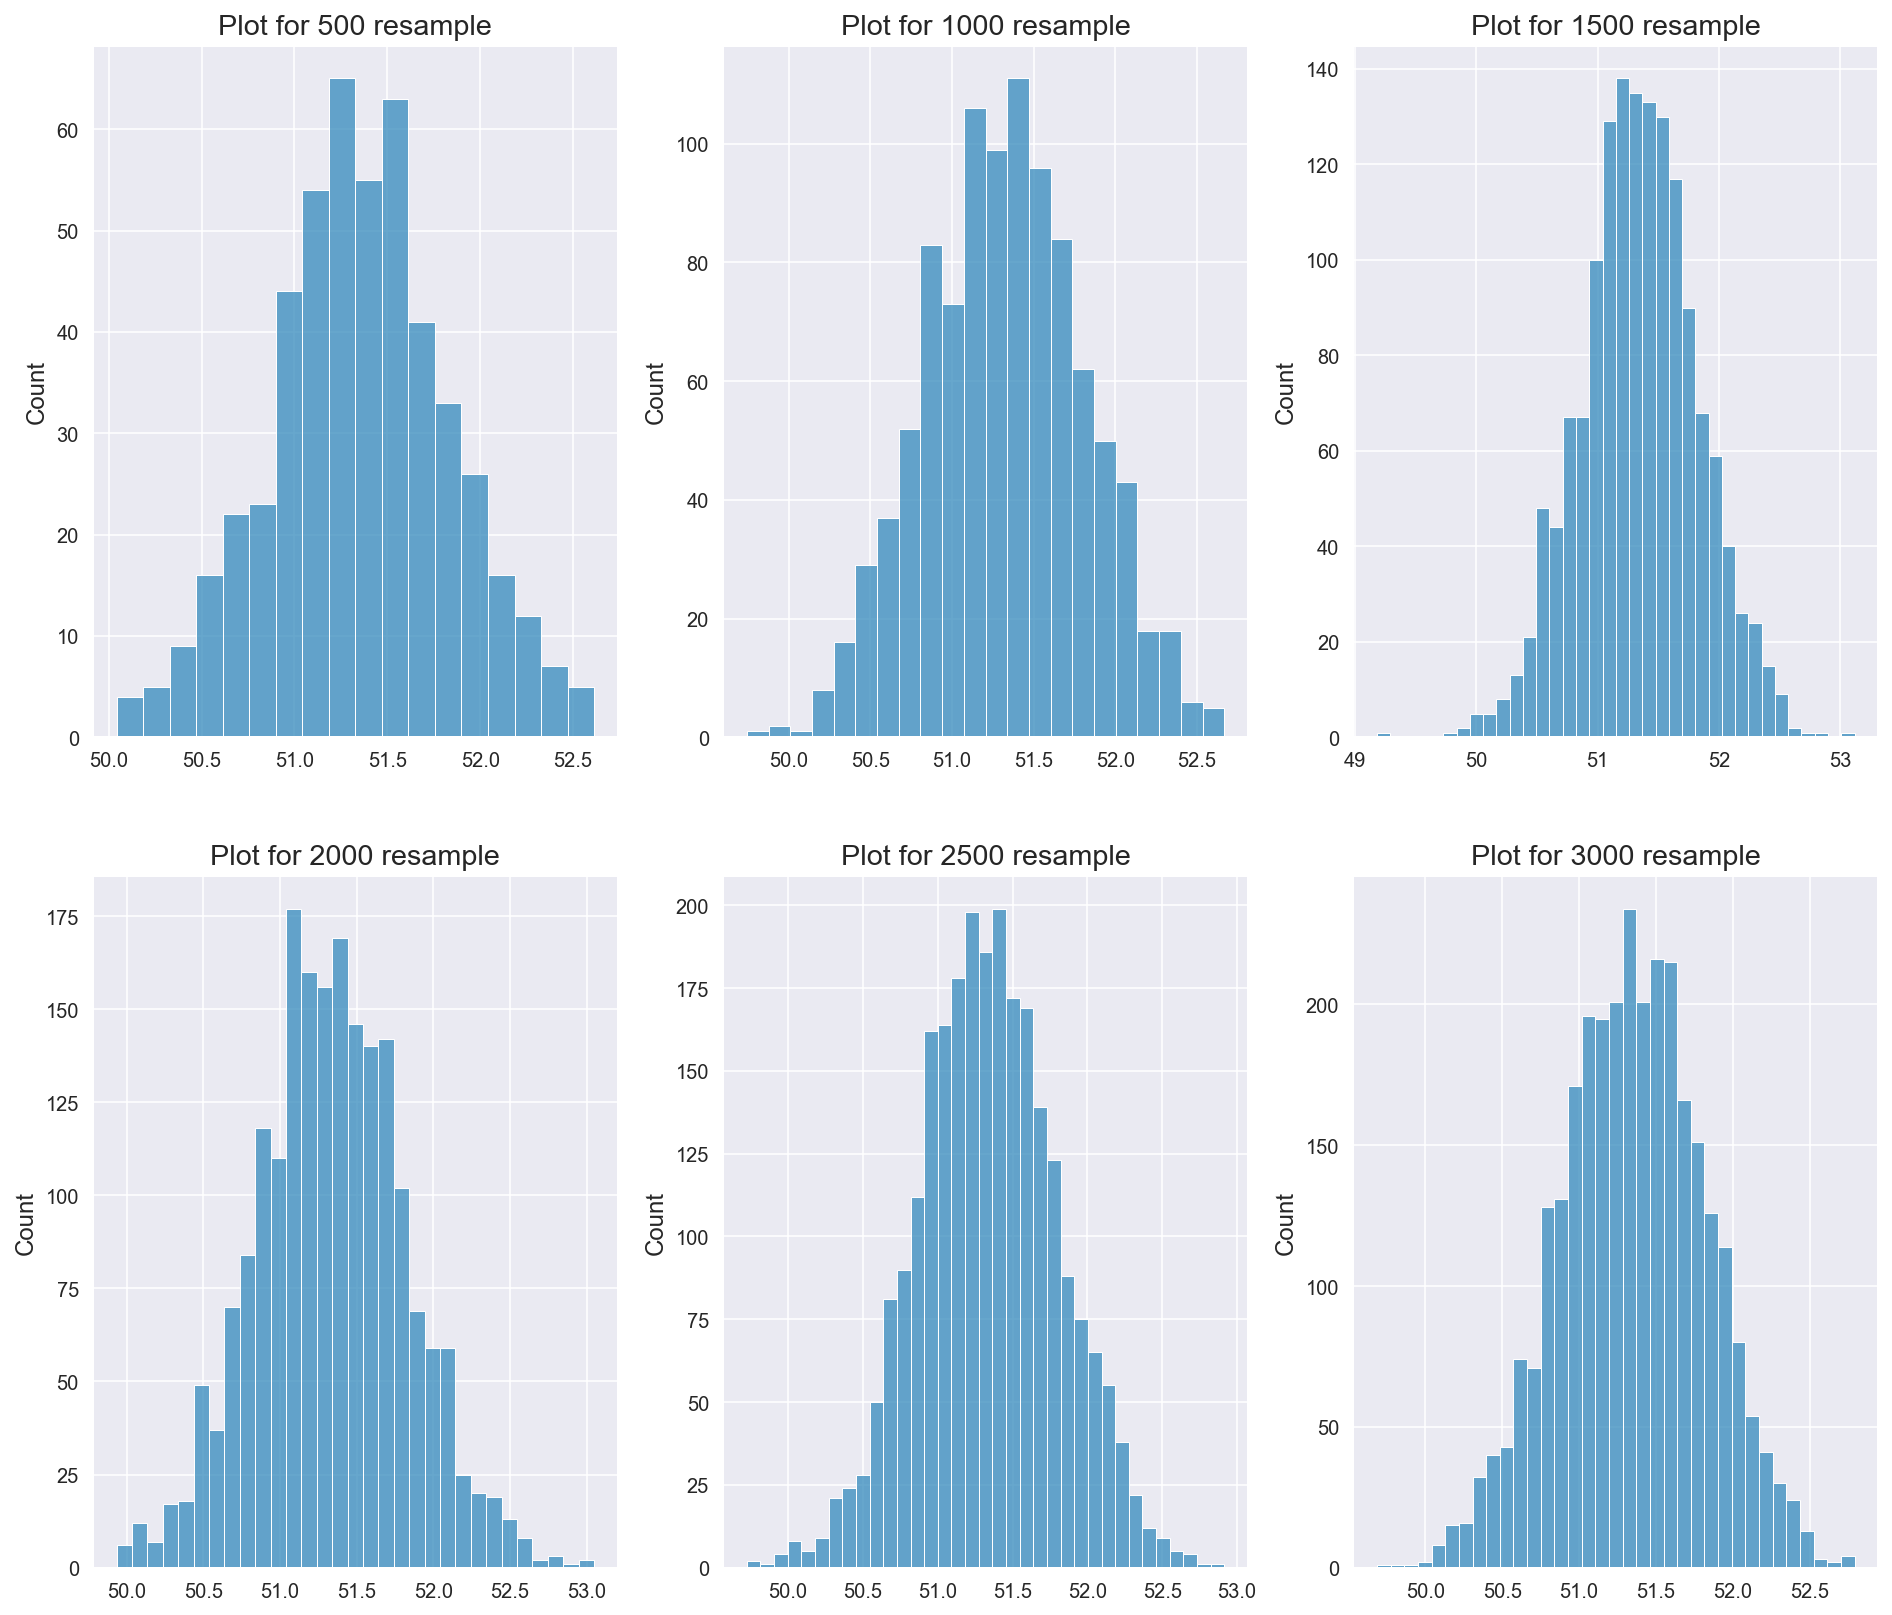

In [108]:
# How about visualising as we perform more resampling?
np.random.seed(42)

fig , ax = plt.subplots(2,3 , figsize = (16,14))
ax = ax.ravel()

for i in range(1,7):
    
    mean_list_A = []

    for j in range(i*500):
        mean_list_A.append(resample(A))
    sns.histplot(mean_list_A , ax = ax[i-1])
    ax[i-1].set_title('Plot for ' +str(i*500) + ' resample');

In [35]:
mean_list_B = []
for i in range(1000):
    mean_list_B.append(resample(B))

<AxesSubplot:ylabel='Count'>

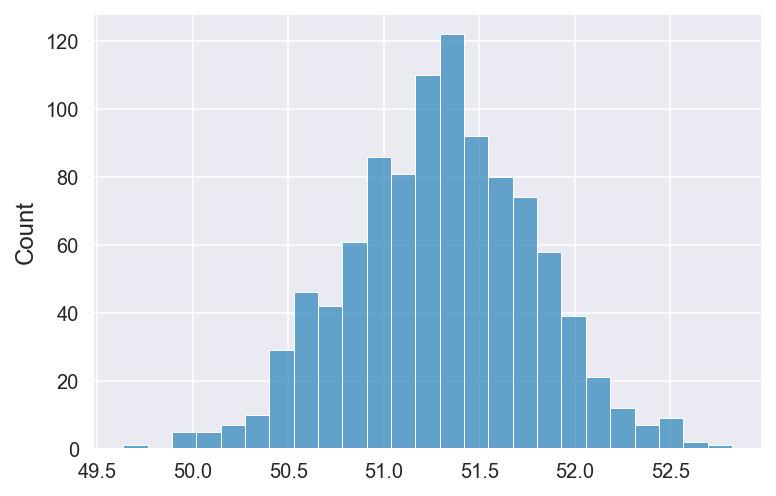

In [36]:
sns.histplot(mean_list_B)